## Observations and Insights 
Type Markdown and LaTeX: 𝛼2

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouseStudy = mouse_metadata.merge(study_results, how='outer')
# Display the data table for preview
mouseStudy.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.
mouseStudy['Mouse ID'].value_counts()

g989    13
g497    10
x401    10
s337    10
w151    10
        ..
b447     1
l872     1
n482     1
o848     1
t573     1
Name: Mouse ID, Length: 249, dtype: int64

In [3]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouseStudy.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep='first', inplace=True)

In [4]:
# Checking the number of mice in the clean DataFrame.
mouseStudy['Mouse ID'].value_counts()

g497    10
x401    10
s337    10
w151    10
l725    10
        ..
v199     1
x226     1
b447     1
h428     1
n482     1
Name: Mouse ID, Length: 249, dtype: int64

## Summary Statistics

In [5]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drugType = mouseStudy.groupby("Drug Regimen")

mean = drugType["Tumor Volume (mm3)"].mean()
median = drugType["Tumor Volume (mm3)"].median()
var = drugType["Tumor Volume (mm3)"].var()
stdDev = drugType["Tumor Volume (mm3)"].std()
sems = drugType["Tumor Volume (mm3)"].sem()

mouseStudySummary = pd.DataFrame({"Mean":mean,
                                  "Median":median,
                                  "Variance":var,
                                  "Standard Deviation":stdDev,
                                  "Standard Error of the Mean":sems})
mouseStudySummary

,Mean,Median,Variance,Standard Deviation,Standard Error of the Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [6]:
# Using the aggregation method, produce the same summary statistics in a single line
drugType["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 1.0, 'Number of measurements per Drug')

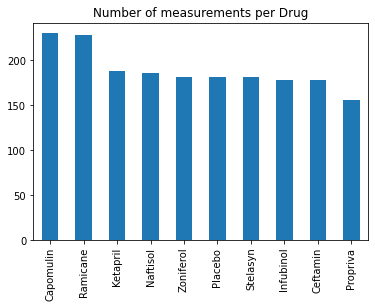

In [7]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
mouseStudy["Drug Regimen"].value_counts().plot(kind='bar')
plt.title("Number of measurements per Drug")

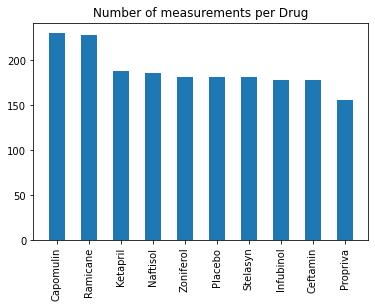

In [8]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.bar(mouseStudy["Drug Regimen"].value_counts().index, mouseStudy["Drug Regimen"].value_counts(), width=0.5)
plt.xticks(rotation=90)
plt.title("Number of measurements per Drug")
plt.show()

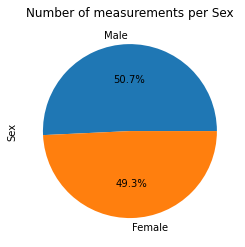

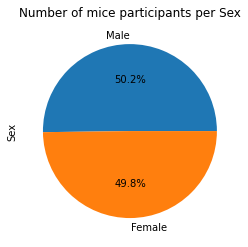

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Create a DataFrame with only one row per Mouse ID
eachMouseOnce = mouseStudy.drop_duplicates(subset=["Mouse ID"], keep='first', inplace=False)

# Number of measurements by sex
mouseStudy["Sex"].value_counts().plot(kind='pie', autopct="%1.1f%%")
plt.title("Number of measurements per Sex")
plt.show()

#Number of mice per Sex
eachMouseOnce["Sex"].value_counts().plot(kind='pie', autopct="%1.1f%%")
plt.title("Number of mice participants per Sex")
plt.show()


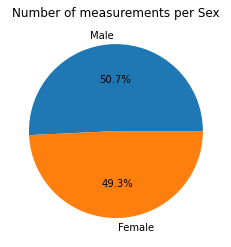

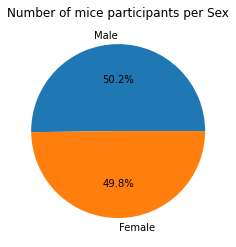

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Number of measurements by sex
plt.pie(mouseStudy["Sex"].value_counts(), labels=mouseStudy["Sex"].value_counts().index, autopct="%1.1f%%")
plt.title("Number of measurements per Sex")
plt.show()

#Number of mice per Sex
plt.pie(eachMouseOnce["Sex"].value_counts(), labels=eachMouseOnce["Sex"].value_counts().index, autopct="%1.1f%%")
plt.title("Number of mice participants per Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [11]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
lastMeasurements = mouseStudy.drop_duplicates(subset=["Mouse ID"], keep='last', inplace=False)
# Put treatments into a list for for loop (and later for plot labels)
promisingDrugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Reduce the last timepoint for each mouse data frame to only the promising drugs
lastMeasurements_reduced = lastMeasurements[lastMeasurements['Drug Regimen'].isin(promisingDrugs)]
# GroupBy the above data frame by Drug Regimen
finalByDrugType = lastMeasurements_reduced.groupby("Drug Regimen")

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = finalByDrugType["Tumor Volume (mm3)"].quantile([.25, .5, .75])

lowerqs = []
upperqs = []
iqrs = []
lowerBounds = []
upperBounds = []
i = 0
for drug in promisingDrugs:
    lowerqs.append(quartiles[drug][.25])
    upperqs.append(quartiles[drug][.75])
    iqrs.append(upperqs[i] - lowerqs[i])
    lowerBounds.append(lowerqs[i] - (1.5*iqrs[i]))
    upperBounds.append(upperqs[i] + (1.5*iqrs[i]))
    # Determine outliers using upper and lower bounds
    print(f"Values lower than {round(lowerBounds[i],3)} for {drug} might be outliers")
    print(f"Values higher than {round(upperBounds[i],3)} for {drug} might be outliers\n")
    i += 1

Values lower than 20.705 for Capomulin might be outliers
Values higher than 51.832 for Capomulin might be outliers

Values lower than 17.913 for Ramicane might be outliers
Values higher than 54.307 for Ramicane might be outliers

Values lower than 36.833 for Infubinol might be outliers
Values higher than 82.741 for Infubinol might be outliers

Values lower than 25.355 for Ceftamin might be outliers
Values higher than 87.666 for Ceftamin might be outliers



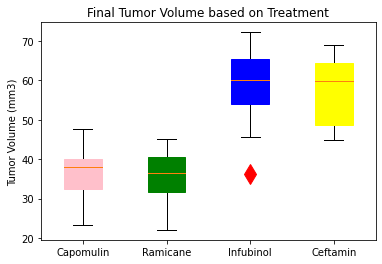

In [12]:
# Create empty list to fill with tumor vol data (for plotting)
tumorVolData = []

for drug in promisingDrugs:
    temp = []
    singleDrug = lastMeasurements[lastMeasurements['Drug Regimen'].isin([drug])]
    
    for volume in singleDrug["Tumor Volume (mm3)"]:
        temp.append(volume)
            
    tumorVolData.append(temp)
#print(tumorVolData)

flierprops = dict(marker='d', markerfacecolor='r', markersize=14,
                  linestyle='none', markeredgecolor='r')
colors = ['pink','green','blue', 'yellow']

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
bp = plt.boxplot(tumorVolData, labels=promisingDrugs, patch_artist=True, flierprops=flierprops)

for item,color in zip(bp['boxes'], colors):
    plt.setp(item, color=color)

plt.title("Final Tumor Volume based on Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.show()   

## Line and Scatter Plots

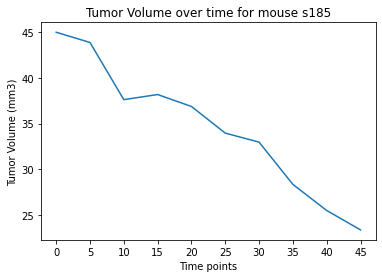

In [13]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
timepoints = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
capomulin = mouseStudy[mouseStudy['Drug Regimen'].isin(['Capomulin'])]
capomulinOneMouse = capomulin[capomulin['Mouse ID'].isin([capomulin['Mouse ID'].iloc[0]])]

plt.plot(capomulinOneMouse["Timepoint"], capomulinOneMouse["Tumor Volume (mm3)"])
plt.xlabel("Time points")
plt.xticks(capomulinOneMouse["Timepoint"])
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Tumor Volume over time for mouse {capomulinOneMouse['Mouse ID'].iloc[0]}")
plt.show()

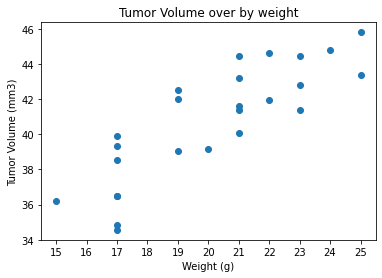

In [29]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulinGrouped = capomulin.groupby("Mouse ID")

plt.scatter(capomulinGrouped['Weight (g)'].mean(), capomulinGrouped['Tumor Volume (mm3)'].mean())
plt.xlabel("Weight (g)")
plt.xticks(range(capomulin["Weight (g)"].min(), capomulin["Weight (g)"].max() + 1))
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Average Tumor Volume of each mouse by Weight")
plt.show()

## Correlation and Regression

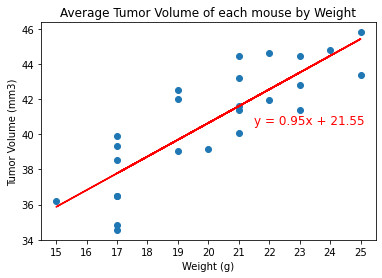

The correlation coefficient for weight and tumor volume of mice on Capmulin is 0.8419363424694717


In [33]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = capomulinGrouped['Weight (g)'].mean()
y_values = capomulinGrouped['Tumor Volume (mm3)'].mean()

# Linear Regression model and create string of linear equation
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the scatter plot from above
plt.scatter(capomulinGrouped['Weight (g)'].mean(), capomulinGrouped['Tumor Volume (mm3)'].mean())
plt.xlabel("Weight (g)")
plt.xticks(range(capomulin["Weight (g)"].min(), capomulin["Weight (g)"].max() + 1))
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Average Tumor Volume of each mouse by Weight")

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(21.5,40.6),fontsize=12,color="red")

plt.show()

# Calculate the correlation coefficient
cc = st.pearsonr(x_values, y_values)[0]
print(f"The correlation coefficient for weight and tumor volume of mice on Capmulin is {cc}")